## Which model is the best?

Follow this link: https://www.kaggle.com/code/jhoward/which-image-models-are-best/

`timm` (Pytorch Image Model) is a libray of Ross Wightman which provides the state-of-the-art pretrained computer vision models.
While HF Transformers is quite specific for NLP, `timm` is for comupter vision

In [122]:
!pip freeze | grep timm

### Data
Ross regularly benchmarks new models as they are added to timm, and puts the results in a CSV in the project's GitHub repo.

In [ ]:
! git clone --depth 1 https://github.com/rwightman/pytorch-image-models.git
%cd pytorch-image-models/results

Cloning into 'pytorch-image-models'...
remote: Enumerating objects: 566, done.
remote: Counting objects: 100% (566/566), done.
remote: Compressing objects: 100% (408/408), done.
remote: Total 566 (delta 221), reused 348 (delta 152), pack-reused 0
Receiving objects: 100% (566/566), 2.49 MiB | 11.37 MiB/s, done.
Resolving deltas: 100% (221/221), done.
/Users/hatruong/hagit/fastai-playbook/pytorch-image-models/results


We use pandas to read result `results-imagenet.csv`

In [ ]:
import pandas as pd
df_result = pd.read_csv("results-imagenet.csv")
df_result.head()

,model,top1,top1_err,top5,top5_err,param_count,img_size,crop_pct,interpolation
0,eva02_large_patch14_448.mim_m38m_ft_in22k_in1k,90.052,9.948,99.048,0.952,305.08,448,1.0,bicubic
1,eva02_large_patch14_448.mim_in22k_ft_in22k_in1k,89.966,10.034,99.012,0.988,305.08,448,1.0,bicubic
2,eva_giant_patch14_560.m30m_ft_in22k_in1k,89.786,10.214,98.992,1.008,"1,014.45",560,1.0,bicubic
3,eva02_large_patch14_448.mim_in22k_ft_in1k,89.624,10.376,98.950,1.050,305.08,448,1.0,bicubic
4,eva02_large_patch14_448.mim_m38m_ft_in1k,89.570,10.430,98.922,1.078,305.08,448,1.0,bicubic


In [ ]:
df_result['model_org'] = df_result['model']
df_result['model'] = df_result['model'].str.split('.').str[0]
df_result.head()

,model,top1,top1_err,top5,top5_err,param_count,img_size,crop_pct,interpolation,model_org
0,eva02_large_patch14_448,90.052,9.948,99.048,0.952,305.08,448,1.0,bicubic,eva02_large_patch14_448.mim_m38m_ft_in22k_in1k
1,eva02_large_patch14_448,89.966,10.034,99.012,0.988,305.08,448,1.0,bicubic,eva02_large_patch14_448.mim_in22k_ft_in22k_in1k
2,eva_giant_patch14_560,89.786,10.214,98.992,1.008,"1,014.45",560,1.0,bicubic,eva_giant_patch14_560.m30m_ft_in22k_in1k
3,eva02_large_patch14_448,89.624,10.376,98.950,1.050,305.08,448,1.0,bicubic,eva02_large_patch14_448.mim_in22k_ft_in1k
4,eva02_large_patch14_448,89.570,10.430,98.922,1.078,305.08,448,1.0,bicubic,eva02_large_patch14_448.mim_m38m_ft_in1k


## How does a neural net really work?

I follow this link: https://www.kaggle.com/code/jhoward/how-does-a-neural-net-really-work

In [88]:
# here some install to make interact work
%pip install -q ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.7 MB/s eta 0:00:00


In [89]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

### Fitting a function with gradient descent

TODO:
- Explain what is a layer
- Explain what is gradient descent

In [93]:
from ipywidgets import interact
from fastai.basics import *

plt.rc('figure', dpi=90)

def plot_function(f, title=None, min=-2.1, max=2.1, color='r', ylim=None):
    x = torch.linspace(min, max, 100)[:,None]
    #
    if ylim:
        plt.ylim(ylim)
    #
    plt.plot(x, f(x), color)
    #
    if title is not None:
        plt.title(title)
    plt.show()

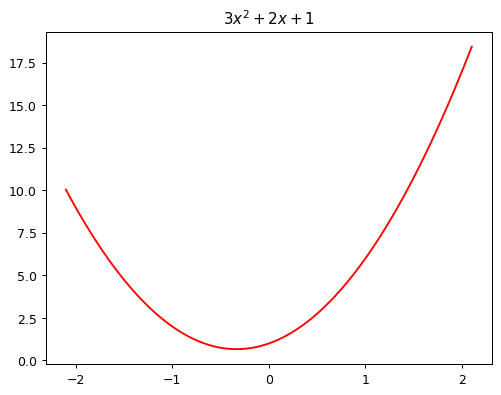

In [94]:
def f(x):
    return 3*x**2 + 2*x + 1

plot_function(f, "$3x^2 + 2x + 1$")

In [95]:
# To make it easier to try out different quadratics for fitting a model to the
# data we'll create, let's create a function that calculates the value of a point on any quadratic:
def quad(a, b, c, x):
    return a*x**2 + b*x + c

In [96]:
# To fix values passed to a function in python, we use the partial function, like so:
# partial is a func of functools.py
def mk_quad(a, b, c):
    return partial(quad, a, b, c)

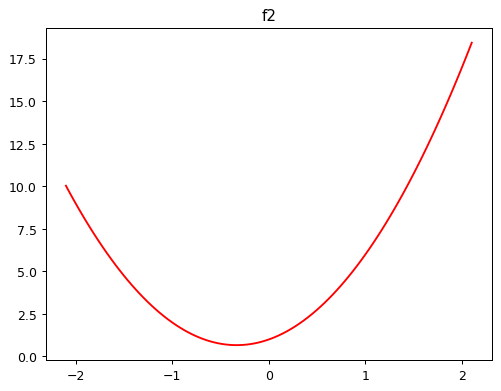

In [97]:
f2 = mk_quad(3, 2, 1)
plot_function(f2, "f2")

Try to add some noise to func `a*x**2 + b*x + c` and plot them. Here are steps:

1.   create a 20-element list of x from -2 to 2 using `torch.linspace` func
2.   add some noise to create `y`


In [98]:
np.random.seed(42)
x1 = torch.linspace(-2, 2, steps=20)
x1.shape

torch.Size([20])

In [99]:
x2 = torch.linspace(-2, 2, steps=20)[:,None]
x2.shape

torch.Size([20, 1])

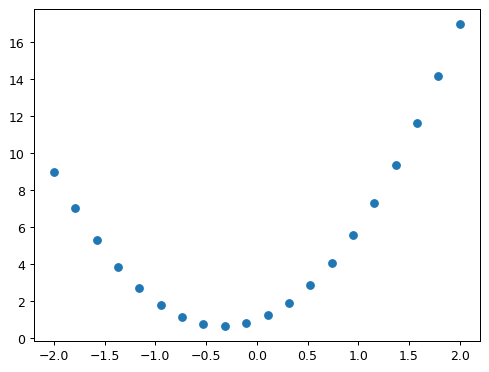

In [100]:
y0 = f(x1)
plt.scatter(x1, y0)

In [101]:
np.random.normal(loc=.0, scale=0.5, size=x1.shape)

array([ 0.24835708, -0.06913215,  0.32384427,  0.76151493, -0.11707669,
       -0.11706848,  0.78960641,  0.38371736, -0.23473719,  0.27128002,
       -0.23170885, -0.23286488,  0.12098114, -0.95664012, -0.86245892,
       -0.28114376, -0.50641556,  0.15712367, -0.45401204, -0.70615185])

In [102]:
y1 = y0 + np.random.normal(size=x1.shape)
y1

tensor([1.0466e+01, 6.8019e+00, 5.3889e+00, 2.4561e+00, 2.1620e+00, 1.9087e+00,
        4.1310e-03, 1.1541e+00, 6.6951e-02, 5.3102e-01, 6.4206e-01, 3.7830e+00,
        2.8702e+00, 3.0448e+00, 6.4098e+00, 6.1171e+00, 9.5634e+00, 9.6774e+00,
        1.2857e+01, 1.7197e+01], dtype=torch.float64)

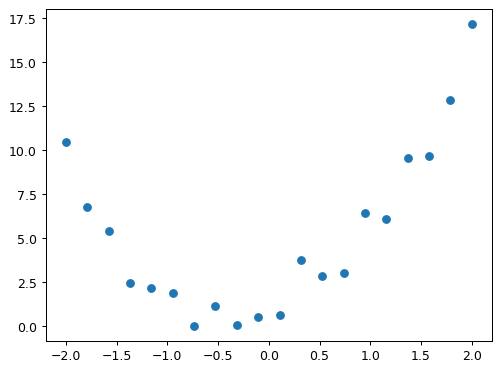

In [103]:
plt.scatter(x1, y1)

In [104]:
@interact(a=1.1, b=1.1, c=1.1)
def plot_quad(a, b, c):
    plt.scatter(x1, y1)
    plot_function(mk_quad(a,b,c), ylim=(-3,13))

interactive(children=(FloatSlider(value=1.1, description='a', max=3.3000000000000003, min=-1.1), FloatSlider(v…

In [105]:
def noise(x, scale): return np.random.normal(scale=scale, size=x.shape)
def add_noise(x, mult, add): return x * (1+noise(x,mult)) + noise(x,add)
np.random.seed(42)
x = torch.linspace(-2, 2, steps=20)[:,None]
y = add_noise(f(x), 0.15, 1.5)
x[:5],y[:5]

(tensor([[-2.0000],
         [-1.7895],
         [-1.5789],
         [-1.3684],
         [-1.1579]]),
 tensor([[11.8690],
         [ 6.5433],
         [ 5.9396],
         [ 2.6304],
         [ 1.7947]], dtype=torch.float64))

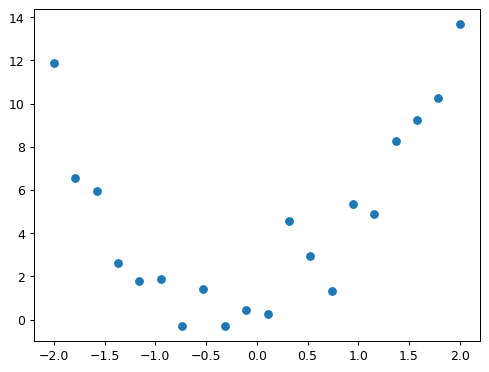

In [106]:
plt.scatter(x,y);

In [107]:
def mae(preds, acts):
    return (torch.abs(preds-acts)).mean()

In [108]:
@interact(a=1.1, b=1.1, c=1.1)
def plot_quad(a, b, c):
    f = mk_quad(a,b,c)
    plt.scatter(x,y)
    loss = mae(f(x), y)
    plot_function(f, ylim=(-3,12), title=f"MAE: {loss:.2f}")

interactive(children=(FloatSlider(value=1.1, description='a', max=3.3000000000000003, min=-1.1), FloatSlider(v…

### Automating gradient descent

In [109]:
def quad_mae(params):
    f = mk_quad(*params)
    return mae(f(x), y)

In [110]:
quad_mae([1.5, 1.5, 1.5])

tensor(1.7041, dtype=torch.float64)

In [111]:
abc = torch.tensor([1.5, 1.5, 1.5])
abc

tensor([1.5000, 1.5000, 1.5000])

In [112]:
# set abc to be able to calculate gradient
abc.requires_grad_()
abc

tensor([1.5000, 1.5000, 1.5000], requires_grad=True)

In [113]:
loss = quad_mae(abc)
loss

tensor(1.7041, dtype=torch.float64, grad_fn=<MeanBackward0>)

In [114]:
# calculate backward
loss.backward()

In [115]:
abc.grad

tensor([-1.2188,  0.0842, -0.4000])

In [116]:
with torch.no_grad():
    abc -= abc.grad*0.01
    loss = quad_mae(abc)

print(f'loss: {loss:0.4f}')

loss: 1.6876


In [117]:
# do 10 iteration to see the loss
for i in range(10):
    loss = quad_mae(abc)
    loss.backward()
    with torch.no_grad(): abc -= abc.grad*0.01
    print(f'Iter {i}, loss: {loss: 0.4f}')

Iter 0, loss:  1.6876
Iter 1, loss:  1.6606
Iter 2, loss:  1.6208
Iter 3, loss:  1.5684
Iter 4, loss:  1.5033
Iter 5, loss:  1.4392
Iter 6, loss:  1.3669
Iter 7, loss:  1.2976
Iter 8, loss:  1.2534
Iter 9, loss:  1.2127


As we loop a large number of times, we can see that the loss will increase. Because when we are close to the correct point but continue to update `abc` which make we jump over this point => use learning rate

### How a neural network approximates any given function

- How neural network works?
    1. Multiply
    2. Replace all negative numbers by zero

- In PyTorch, the function `max(x, 0)` is written as `np.clip(x,0)`.
- The combination between linear func & max func is called rectified linear function
- This Rectified linear func has multiple implementations: `np.clip(x, 0)`, `torch.clip(x, 0)`, `F.relu(x)` (F refer to torch.nn.functional)

In [118]:
def rectify_linear(m, b, x):
    y = m*x + b
    return torch.clip(y, 0.)


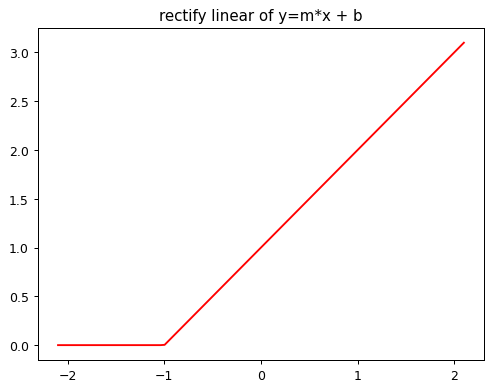

In [119]:
# plot func rectify_linear with fixed m & b (m=1 and b=1), and value of x is range from -2.1 to 2.1
plot_function(partial(rectify_linear, 1, 1), title="rectify linear of y=m*x + b")

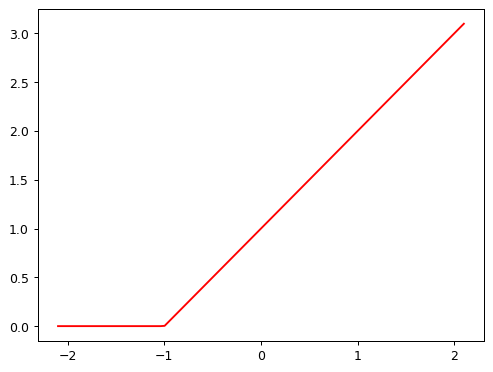

In [120]:
import torch.nn.functional as F
def rectify_linear_v2(m, b, x):
    y = m*x + b
    return F.relu(y)

plot_function(partial(rectify_linear_v2, 1, 1))

In [121]:
@interact(m=1.5, b=1.5)
def plot_relu(m, b):
    plot_function(partial(rectify_linear, m, b), ylim=(-1,4))

interactive(children=(FloatSlider(value=1.5, description='m', max=4.5, min=-1.5), FloatSlider(value=1.5, descr…